# Building a Tokenizer Class from Scratch in Python

Tokenization is a fundamental step in NLP, where raw text is converted into tokens (e.g., words, subwords, or characters) that models can process. While libraries like Hugging Face provide robust pre-built tokenizers, it is sometimes useful to understand how to create a tokenizer from scratch.

---

## Steps to Build a Tokenizer

### 1. Define the Tokenization Logic
The first step is to decide how the text will be split into tokens:
- Word-based tokenization: Splits text into words.
- Character-based tokenization: Breaks text into individual characters.
- Subword tokenization: Breaks text into smaller meaningful units (e.g., using Byte Pair Encoding).

### 2. Handle Special Tokens
Special tokens like `[PAD]`, `[UNK]`, `[CLS]`, and `[SEP]` are often used to signal padding, unknown words, and sentence delimiters.

### 3. Create a Vocabulary
The tokenizer needs a vocabulary that maps tokens to unique IDs. This can be built from scratch by analyzing the corpus or predefined.

### 4. Padding and Truncation

**Padding** is the process of adding special tokens (e.g., `[PAD]`) to ensure that all input sequences in a batch have the same length. This is crucial because machine learning models process data in batches of equal length. Padding is especially important for shorter sequences that don’t meet the maximum length requirement.

**Truncation** is the process of shortening sequences that exceed the maximum allowed length. This is necessary because most NLP models (like BERT and GPT) have a fixed maximum sequence length, and exceeding it would cause errors.




In [3]:
import datasets

train_data, test_data = datasets.load_dataset("imdb", split=["train", "test"])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/nmadali/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
train_text=[sample['text'] for sample in train_data]

In [7]:
len(train_text)

25000

In [9]:
seq_lens=[len(text.split()) for text in train_text]

In [13]:
np.mean(seq_lens) # trucation size 

233.7872

In [11]:
np.argmax(seq_lens)

13756

In [12]:
train_text[np.argmax(seq_lens)]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

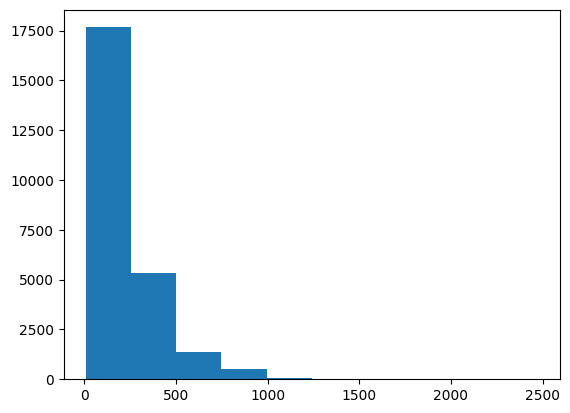

In [10]:
import matplotlib.pyplot as plt
import numpy as np


plt.hist(seq_lens)
plt.show() 

In [4]:
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [19]:
import string

import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nmadali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [201]:
class Tokenizer:
  def __init__(self, stop_words, puncts, truncation_size=256  ):
      
    self.stop_words=stop_words
    self.puncts=puncts
    self.df = {}
    self.truncation_size=truncation_size
  def format_string(self, text):
      tokens=[ token for token  in text.lower().split() if not ((token in self.stop_words) or  (token in self.puncts))   ]
      return tokens  
      
  def tokenize(self, text, truncation=False):
      tokens=self.format_string(text)
      tmp=[]
      for token in tokens:
          if token in self.w2i :
              tmp.append(self.w2i[token])
          else:
              tmp.append(self.w2i['<unk>'])
              
      if truncation:
          tmp=tmp[: self.truncation_size]
          output= np.ones(self.truncation_size)*self.w2i['<pad>']
          output[:len(tmp)]=tmp
          return list(output)
      else:
          return tmp
  def detokenize(self, idxs):
      words=[self.i2w[idx] for idx in idxs]  
      
      return ''.join(word+' ' for word in words )
  def fit(self, train_text):
    for text in train_text:
        tokens=set(self.format_string(text))
        for token in tokens:
            if token in self.df:
                self.df[token]+=1
            else: 
                self.df[token]=1
    self.df['<unk>']=1
    self.df['<pad>']=1

    
    
    self.w2i = { k:idx for idx, (k,v) in enumerate(self.df.items())}
    self.i2w = { v:k for (k,v) in  self.w2i .items() }

    self.idf=np.zeros(len(self.df))
    for (k,v) in self.w2i.items():
        self.idf[v]=np.log((1+len(train_text))/(1+self.df[k]))  
        

In [202]:
stop_words= stopwords.words('english')
puncts=  [punt for punt in string.punctuation]

In [203]:
tokenizer=Tokenizer(stop_words , puncts)

In [204]:
tokenizer.fit(train_text)

In [205]:
tokenizer.detokenize(tokenizer.tokenize(train_text[4], truncation=True))

'oh, brother...after hearing ridiculous film umpteen years think old peggy lee song..<br /><br />"is is??" ...i early teen smoked fish hit u.s. young get theater (although manage sneak "goodbye columbus"). screening local film museum beckoned finally could see film, except old parents schlepped see it!!<br /><br />the reason film condemned anonymous sands time obscenity case sparked u.s. release. millions people flocked stinker, thinking going see sex film...instead, got lots closeups gnarly, repulsive swedes, on-street interviews bland shopping malls, asinie political pretension...and feeble who-cares simulated sex scenes saggy, pale actors.<br /><br />cultural icon, holy grail, historic artifact..whatever thing was, shred it, burn it, stuff ashes lead box!<br /><br />elite esthetes still scrape find value boring pseudo revolutionary political spewings..but censorship scandal, would ignored, forgotten.<br /><br />instead, "i blank, blank" rhythymed title repeated endlessly years titil


## Understanding PyTorch `Dataset`

The `Dataset` class is an abstract class that you need to subclass to load and preprocess your data. A `Dataset` object acts as a container for your data and provides two key methods:

1. **`__len__`**: Returns the number of samples in the dataset.
2. **`__getitem__`**: Fetches a single data point (input and target) by index.

### Creating a Custom Dataset
You can create a custom dataset by subclassing `torch.utils.data.Dataset` and overriding its methods.

```python
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, targets):
        """
        Initialize the dataset with data and targets.
        Args:
            data: The input data (e.g., features).
            targets: The corresponding labels or targets.
        """
        self.data = data
        self.targets = targets

    def __len__(self):
        """
        Return the total number of samples.
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Retrieve a sample and its target at the given index.
        """
        return self.data[idx], self.targets[idx]

# Example usage
data = torch.tensor([[1, 2], [3, 4], [5, 6]])
targets = torch.tensor([0, 1, 0])
dataset = CustomDataset(data, targets)

print("Number of samples:", len(dataset))
print("First sample:", dataset[0])


In [216]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, train_data, tokenizer, return_type='BoG'):
        """
        Initialize the dataset with data and targets.
        Args:
            data: The input data (e.g., features).
            targets: The corresponding labels or targets.
        """
        self.train_data = train_data
        self.tokenizer = tokenizer
        self. return_type=return_type # BoG, Tf-Idf Ids
    def __len__(self):
        """
        Return the total number of samples.
        """
        return len(self.train_data)

    def __getitem__(self, idx):
        """
        Retrieve a sample and its target at the given index.
        """
        text,label= self.train_data[idx]['text'], self.train_data[idx]['label']
        if self.return_type=='Ids'  :       
    
            idxs= np.array(self.tokenizer.tokenize(text, truncation=True)).astype('int32')
            return idxs, label
        elif self.return_type=='BoG':
            vec=np.zeros(len(self.tokenizer.w2i))
            idxs= self.tokenizer.tokenize(text)
            for idx in idxs:
                vec[idx]+=1
            return vec, label    
        else:
            tf=np.zeros(len(self.tokenizer.w2i))
            idxs= self.tokenizer.tokenize(text)
            for idx in idxs:
                tf[idx]+=1
            tf/=len(idxs) 

            for i in range(len(tf)):
                tf[i]*=self.tokenizer.idf[i]
            return tf, label

In [217]:
train_dataset = CustomDataset(train_data, tokenizer,return_type='Tf-Idf' )
test_dataset = CustomDataset(test_data, tokenizer)

In [219]:
train_dataset[1]

(array([0.        , 0.01009761, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 0)

In [220]:
train_dataset[1][0].shape

(251445,)

In [221]:
len(tokenizer.w2i)

251445

# Understanding PyTorch `DataLoader`

The `DataLoader` in PyTorch is a utility that simplifies and optimizes the process of loading data during training and evaluation. It works in conjunction with a `Dataset` to provide batches of data, handle shuffling, and enable parallel loading for efficiency.

---
## Parameters of `DataLoader`

- **`dataset`**: The dataset to load data from (must implement `__getitem__` and `__len__`).
- **`batch_size`**: Number of samples in each batch.
- **`shuffle`**: Boolean to indicate whether to shuffle the data at the start of each epoch.
- **`num_workers`**: Number of subprocesses to use for data loading (set to `0` for no parallelism).
- **`collate_fn`**: Function to merge samples into a batch. Useful for handling complex data formats.
- **`drop_last`**: Drops the last incomplete batch if the dataset size is not divisible by `batch_size`.

---
### Define a DataLoader
```python

def custom_collate(batch):
    inputs, targets = zip(*batch)
    # Example: Convert to tensors or handle variable-length sequences
    return torch.tensor(inputs), torch.tensor(targets)

dataloader = DataLoader(dataset, batch_size=2, collate_fn=custom_collate)

In [222]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [223]:
batch=next(iter(train_dataloader))

In [224]:
batch.shape

AttributeError: 'list' object has no attribute 'shape'

In [225]:
len(batch)

2

In [226]:
batch[0].shape

torch.Size([4, 251445])

In [227]:
batch[1].shape

torch.Size([4])

In [159]:
batch[1]

tensor([0, 0, 1, 0])

In [ ]:
(0 1) (2, 